In [1]:
data_path = "D:/Huge datasets/avito/data"

In [2]:
import pandas as pd
import os

In [3]:
train = os.path.join(data_path, "train.csv.zip")

In [4]:
train = pd.read_csv(train,compression="zip", nrows= 10000)
train.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),"Кокон для сна малыша,пользовались меньше месяц...",400.0,2,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,"Стойка для одежды, под вешалки. С бутика.",3000.0,19,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,"В хорошем состоянии, домашний кинотеатр с blu ...",4000.0,9,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,Продам кресло от0-25кг,2200.0,286,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",Все вопросы по телефону.,40000.0,3,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797


array(['Свердловская область', 'Самарская область', 'Ростовская область',
       'Татарстан', 'Волгоградская область', 'Нижегородская область',
       'Пермский край', 'Оренбургская область', 'Ханты-Мансийский АО',
       'Тюменская область', 'Башкортостан', 'Краснодарский край',
       'Новосибирская область', 'Омская область', 'Белгородская область',
       'Челябинская область', 'Воронежская область',
       'Кемеровская область', 'Саратовская область',
       'Владимирская область', 'Калининградская область',
       'Красноярский край', 'Ярославская область', 'Удмуртия',
       'Алтайский край', 'Иркутская область', 'Ставропольский край',
       'Тульская область'], dtype=object)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
item_id                 10000 non-null object
user_id                 10000 non-null object
region                  10000 non-null object
city                    10000 non-null object
parent_category_name    10000 non-null object
category_name           10000 non-null object
param_1                 9606 non-null object
param_2                 5610 non-null object
param_3                 4232 non-null object
title                   10000 non-null object
description             9202 non-null object
price                   9452 non-null float64
item_seq_number         10000 non-null int64
activation_date         10000 non-null object
user_type               10000 non-null object
image                   9294 non-null object
image_top_1             9294 non-null float64
deal_probability        10000 non-null float64
dtypes: float64(3), int64(1), object(14)
memory usage: 1.4+ MB


In [12]:
train.title.map(len).mean()

21.5264

In [50]:
train.description.map(lambda x: len(str(x))).median() # 182 / 90 characters en median

90.0

In [51]:
train.description.map(lambda x: len(str(x).split())).median() # 25 mots en moyenne/ 13 en mediane

13.0

In [25]:
from nltk.tokenize.toktok import ToktokTokenizer # tokenizer tested on russian
from nltk import sent_tokenize # should be multilingual

In [27]:
toktok = ToktokTokenizer()

In [38]:
pd.set_option('display.max_colwidth', 100)
train["desc_sentences"] = train.description.map(lambda x: sent_tokenize(str(x)))

In [41]:
train['desc_tokenized'] = train.desc_sentences.map(lambda x: toktok.tokenize_sents(x))

In [42]:
train.desc_tokenized

0                                  [[Кокон, для, сна, малыша, ,, пользовались, меньше, месяца.цвет, серый]]
1                                               [[Стойка, для, одежды, ,, под, вешалки, .], [С, бутика, .]]
2       [[В, хорошем, состоянии, ,, домашний, кинотеатр, с, blu, ray, ,, USB, .], [Если, настроить, ,, т...
3                                                                              [[Продам, кресло, от0-25кг]]
4                                                                         [[Все, вопросы, по, телефону, .]]
5                                                                                 [[В, хорошем, состоянии]]
6       [[Электро, водонагреватель, накопительный, на, 100, литров, Термекс, ID, 100V, ,, плоский, ,, вн...
7                                                                   [[Бойфренды, в, хорошем, состоянии, .]]
8                                                                          [[54, раз, мер, очень, удобное]]
9                       [[По

In [45]:
from textblob import TextBlob

In [47]:
blob = TextBlob(train.description[15])
blob.translate(from_lang="ru", to =  "en") # uses google api

In [46]:
def safe_translate(text):
    try:
        blob = TextBlob(text)
        tr = blob.translate(from_lang="ru", to =  "en") # uses google api
        return str(tr)
    except:
        return text
    

In [67]:
train.category_name[:150].map(lambda x: safe_translate(x)).unique()

array(['Goods for children and toys', 'Furniture and interior',
       'Audio and video', 'Cars', 'Repair and construction',
       'Clothes, shoes, accessories', "Children's clothing and footwear",
       'Apartments', 'Computer products', 'Dogs',
       'Houses, cottages, cottages', 'Goods for pets', 'Other animals',
       'Rooms', 'Collecting', 'Commercial property',
       'Dishes and products for the kitchen', 'beauty and health',
       'Aquarium', 'Phones', 'Watches & Jewelry', 'Offer of services',
       'Birds', 'Sport and leisure', 'Musical instruments', 'Appliances',
       'Games, consoles and programs', 'Land', 'Food', 'Cats',
       'Tickets and travel', 'Books and magazines', 'Plants',
       'Garages and parking places'], dtype=object)

In [74]:
train.city[:50].map(safe_translate).unique()

array(['Ekaterinburg', 'Samara', 'Rostov-na-Donu', 'Naberezhnye Chelny',
       'Volgograd', 'Chistopol', 'Nizhny Novgorod', 'Permian', 'Orenburg',
       'Khanty-Mansiysk', 'Zavodoukovsk', 'Tuymazy', 'Kazan', 'Krasnodar',
       'Novosibirsk', 'Moskalenki', 'Belgorod', 'Berdsk', 'Magnitogorsk',
       'Voronezh', 'Tolyatti', 'Novokuznetsk', 'Saratov', 'Aksai',
       'Armavir', 'Vladimir', 'Gvardeysk', 'Chelyabinsk', 'Poikovsky',
       'Krasnoyarsk'], dtype=object)

In [44]:
[safetrain.parent_category_name.unique()]

array(['Личные вещи', 'Для дома и дачи', 'Бытовая электроника',
       'Транспорт', 'Недвижимость', 'Животные', 'Хобби и отдых', 'Услуги',
       'Для бизнеса'], dtype=object)

In [79]:

train.param_1[:50].map(lambda x: safe_translate(str(x))).unique()

array(['Bed dress', 'Other', 'Video, DVD and Blu-ray players',
       'Car seats', 'With mileage', 'Plumbing and sauna',
       "Women's clothing", 'For girls', 'Rent', 'Goods for school',
       'Monitors', 'German Shepherd', 'Toys', 'Hire', 'Selling', 'nan',
       'Textiles and carpets', 'For boys', 'Building materials',
       'Farm animals', 'Accessories', 'Baby carriages', "Men's Clothing",
       'Tokens, medals, badges', 'Kitchen goods', "Children's furniture",
       'Devices and accessories'], dtype=object)

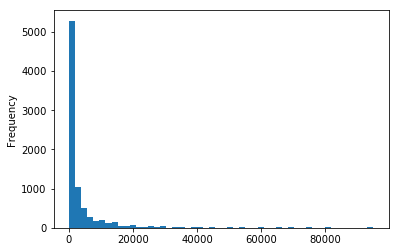

In [8]:
%matplotlib inline
trunc = train.price < 100000
train.price[trunc].plot(kind = "hist", bins = 50)

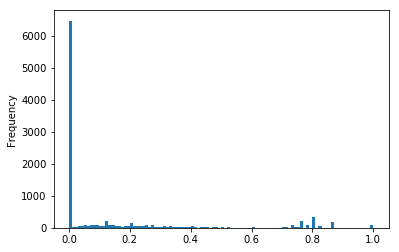

In [10]:
train.deal_probability.plot(kind = "hist", bins = 100) 

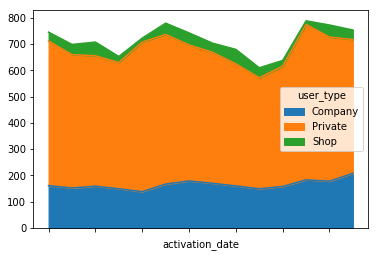

In [25]:
train.groupby(['activation_date', "user_type"], as_index=False).count().pivot(index='activation_date',columns="user_type")["item_id"].plot(kind = "area")

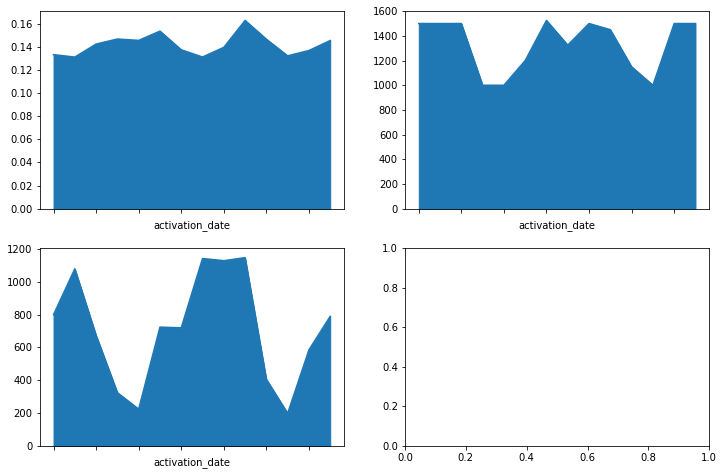

In [43]:
import matplotlib.pyplot as plt
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (12,8))
train.groupby('activation_date')["deal_probability"].mean().plot(kind = "area", ax = ax1) # seems smooth
train.groupby('activation_date')["price"].median().plot(kind = "area", ax = ax2) # seems smooth
train.groupby('activation_date')["item_seq_number"].mean().plot(kind = "area", ax = ax3) # seems not smooth? it's just an id...


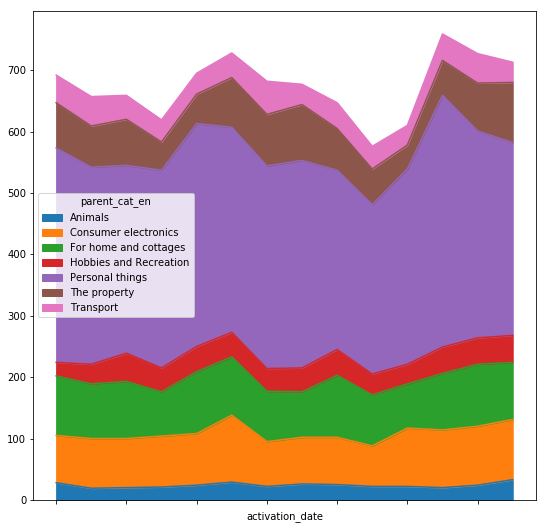

In [58]:
train.groupby(['activation_date', "parent_cat_en"], as_index=False).count()\
    .pivot(index='activation_date',columns="parent_cat_en")["item_id"]\
    .plot(kind = "area", figsize = (9,9));

### We can drop dates, they seem irrelevant

In [49]:
category_ru = train.parent_category_name[:50].unique()

In [50]:
category_en = {c:safe_translate(c)  for c in category_ru}

In [52]:
train["parent_cat_en"] = train.parent_category_name.map(category_en)

In [59]:
category_en

{'Бытовая электроника': 'Consumer electronics',
 'Для дома и дачи': 'For home and cottages',
 'Животные': 'Animals',
 'Личные вещи': 'Personal things',
 'Недвижимость': 'The property',
 'Транспорт': 'Transport',
 'Хобби и отдых': 'Hobbies and Recreation'}

In [ ]:
{'Бытовая электроника': 'Consumer electronics',
 'Для дома и дачи': 'For home and cottages',
 'Животные': 'Animals',
 'Личные вещи': 'Personal things',
 'Недвижимость': 'The property',
 'Транспорт': 'Transport',
 'Хобби и отдых': 'Hobbies and Recreation'}

In [107]:
category_ru = train.category_name[:50].unique()
category_en = {c:safe_translate(c)  for c in category_ru}

In [108]:
{'Автомобили': 'Cars',
 'Аудио и видео': 'Audio and video',
 'Детская одежда и обувь': "Children's clothing and footwear",
 'Дома, дачи, коттеджи': 'Houses, cottages, cottages',
 'Другие животные': 'Other animals',
 'Квартиры': 'Apartments',
 'Коллекционирование': 'Collecting',
 'Коммерческая недвижимость': 'Commercial property',
 'Комнаты': 'Rooms',
 'Красота и здоровье': 'beauty and health',
 'Мебель и интерьер': 'Furniture and interior',
 'Одежда, обувь, аксессуары': 'Clothes, shoes, accessories',
 'Посуда и товары для кухни': 'Dishes and products for the kitchen',
 'Ремонт и строительство': 'Repair and construction',
 'Собаки': 'Dogs',
 'Товары для детей и игрушки': 'Goods for children and toys',
 'Товары для животных': 'Goods for pets',
 'Товары для компьютера': 'Computer products'}

{'Автомобили': 'Cars',
 'Аудио и видео': 'Audio and video',
 'Детская одежда и обувь': "Children's clothing and footwear",
 'Дома, дачи, коттеджи': 'Houses, cottages, cottages',
 'Другие животные': 'Other animals',
 'Квартиры': 'Apartments',
 'Коллекционирование': 'Collecting',
 'Коммерческая недвижимость': 'Commercial property',
 'Комнаты': 'Rooms',
 'Красота и здоровье': 'beauty and health',
 'Мебель и интерьер': 'Furniture and interior',
 'Одежда, обувь, аксессуары': 'Clothes, shoes, accessories',
 'Посуда и товары для кухни': 'Dishes and products for the kitchen',
 'Ремонт и строительство': 'Repair and construction',
 'Собаки': 'Dogs',
 'Товары для детей и игрушки': 'Goods for children and toys',
 'Товары для животных': 'Goods for pets',
 'Товары для компьютера': 'Computer products'}

In [110]:
regions_ru = train.region.unique()
regions_en = {c:safe_translate(c)  for c in regions_ru}

In [113]:
{'Алтайский край': 'Altai region',
 'Башкортостан': 'Bashkortostan',
 'Белгородская область': 'Belgorod region',
 'Владимирская область': 'Vladimir region',
 'Волгоградская область': 'Volgograd region',
 'Воронежская область': 'Voronezh region',
 'Иркутская область': 'Irkutsk region',
 'Калининградская область': 'Kaliningrad region',
 'Кемеровская область': 'Kemerovo Region',
 'Краснодарский край': 'Krasnodar region',
 'Красноярский край': 'Krasnoyarsk region',
 'Нижегородская область': 'Nizhny Novgorod Region',
 'Новосибирская область': 'Novosibirsk region',
 'Омская область': 'Omsk Region',
 'Оренбургская область': 'Orenburg region',
 'Пермский край': 'Perm Region',
 'Ростовская область': 'Rostov region',
 'Самарская область': 'Samara Region',
 'Саратовская область': 'Saratov region',
 'Свердловская область': 'Sverdlovsk region',
 'Ставропольский край': 'Stavropol region',
 'Татарстан': 'Tatarstan',
 'Тульская область': 'Tula region',
 'Тюменская область': 'Tyumen region',
 'Удмуртия': 'Udmurtia',
 'Ханты-Мансийский АО': 'Khanty-Mansiysk Autonomous Okrug',
 'Челябинская область': 'Chelyabinsk region',
 'Ярославская область': 'Yaroslavl region'}

{'Алтайский край': 'Altai region',
 'Башкортостан': 'Bashkortostan',
 'Белгородская область': 'Belgorod region',
 'Владимирская область': 'Vladimir region',
 'Волгоградская область': 'Volgograd region',
 'Воронежская область': 'Voronezh region',
 'Иркутская область': 'Irkutsk region',
 'Калининградская область': 'Kaliningrad region',
 'Кемеровская область': 'Kemerovo Region',
 'Краснодарский край': 'Krasnodar region',
 'Красноярский край': 'Krasnoyarsk region',
 'Нижегородская область': 'Nizhny Novgorod Region',
 'Новосибирская область': 'Novosibirsk region',
 'Омская область': 'Omsk Region',
 'Оренбургская область': 'Orenburg region',
 'Пермский край': 'Perm Region',
 'Ростовская область': 'Rostov region',
 'Самарская область': 'Samara Region',
 'Саратовская область': 'Saratov region',
 'Свердловская область': 'Sverdlovsk region',
 'Ставропольский край': 'Stavropol region',
 'Татарстан': 'Tatarstan',
 'Тульская область': 'Tula region',
 'Тюменская область': 'Tyumen region',
 'Удмуртия

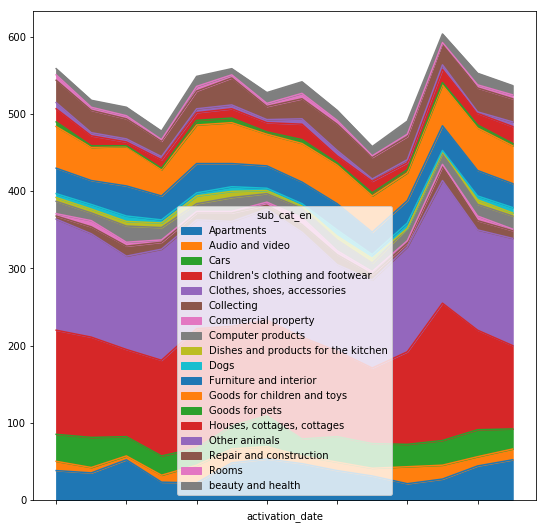

In [69]:
train["sub_cat_en"] = train.category_name.map(category_en)
train.groupby(['activation_date', "sub_cat_en"], as_index=False).count()\
    .pivot(index='activation_date',columns="sub_cat_en")["item_id"]\
    .plot(kind = "area", figsize = (9,9));

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [87]:
russian_stops = stopwords.open('russian').read().splitlines()

In [88]:
tf = TfidfVectorizer(stop_words=russian_stops)


In [89]:
title_mat = tf.fit_transform(train.title)

C:\Users\arman\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
scores = cross_val_score(X= title_mat, y = train.deal_probability, estimator= lr, scoring="neg_mean_squared_error")

In [106]:
import numpy as np
[np.sqrt(s*-1) for s in scores]

[0.3068295656418818, 0.3039141610478097, 0.2981647117575761]

In [95]:
from sklearn.metrics import regression